### Lets predict an outcome using Regression and Classification models

In [1]:
from pandas import read_csv
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# load the dataset
# df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv', header=None)
df=read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Attribute Information:**

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per '$10,000'        
    
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

### We are going to predict the median value of owner-occupied homes in $1000's

### This is a Regression or Classification problem?

### Convert Dataframe into an array

In [2]:
data = df.values
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

### Create the train test split

In [3]:
# split into input and output elements (Dependant and Target variables)
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=1)

### fit the Regression model to our dataset

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)
# Predict the output
yhat = model.predict(X_test)

### Evaluate predictions using different error methods

In [5]:
mae = sklearn.metrics.mean_absolute_error(y_test, yhat)
print('MAE: ', mae)

MAE:  3.4174722788016623


In [6]:
# from sklearn.metrics import mean_squared_error
mse = sklearn.metrics.mean_squared_error(y_test, yhat, squared=False)
print('MSE: ',mse)

rms = sklearn.metrics.mean_squared_error(y_test, yhat, squared=True)
print('RMS: ', rms)

MSE:  4.549557752626552
RMS:  20.698475744484366


### Plot the results against the actual values to visualize the results

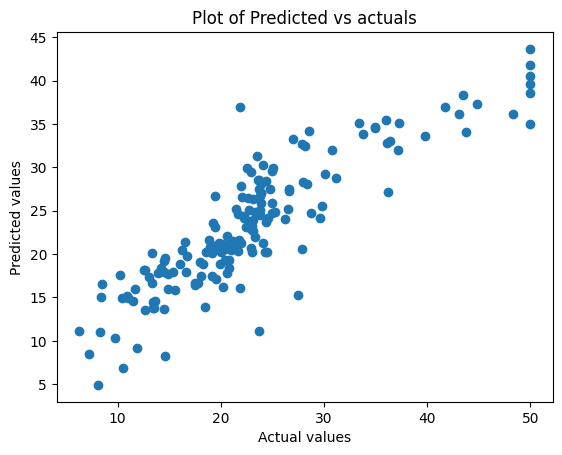

In [7]:
import matplotlib.pyplot as plt
plt.scatter(y_test, yhat)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Plot of Predicted vs actuals')
plt.show()

### QQ plot to test the normality of the residual distribution

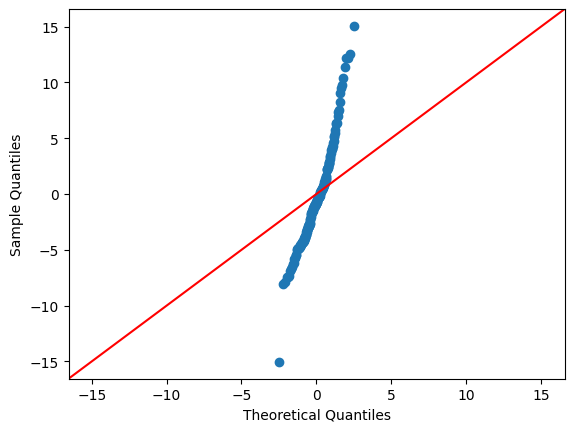

In [8]:
residual = (y_test - yhat)
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(residual, line='45')
plt.show()

### Plot histogram to check if the residuals follow a normal distribution

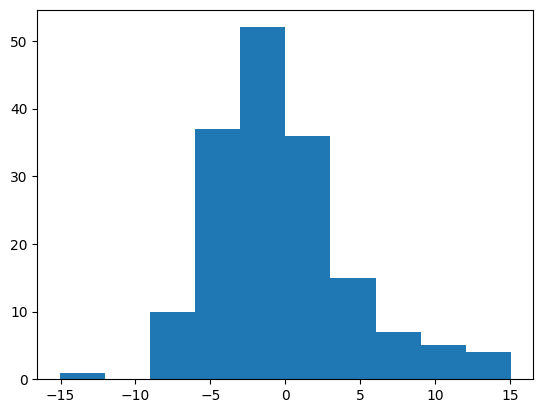

In [9]:
plt.hist(residual)
plt.show()

# Classifcation Task using Machine Learning Sklearn

In [10]:
import numpy as np
# diabetics=read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")
# diabetics[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetics[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, nan)
diabetics=read_csv("https://raw.githubusercontent.com/ashvinmanoj/DGVC/main/Dataset/diabetics.csv")
diabetics=diabetics.drop(['Unnamed: 0'], axis=1)
diabetics.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [11]:
diabetics.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
diabetics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


#### convert datafarme into an array

In [13]:
data=diabetics.values

In [14]:
from sklearn.linear_model import LogisticRegression

X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

model=LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Plot the dataset to look for NAN (or missing values)

<AxesSubplot:>

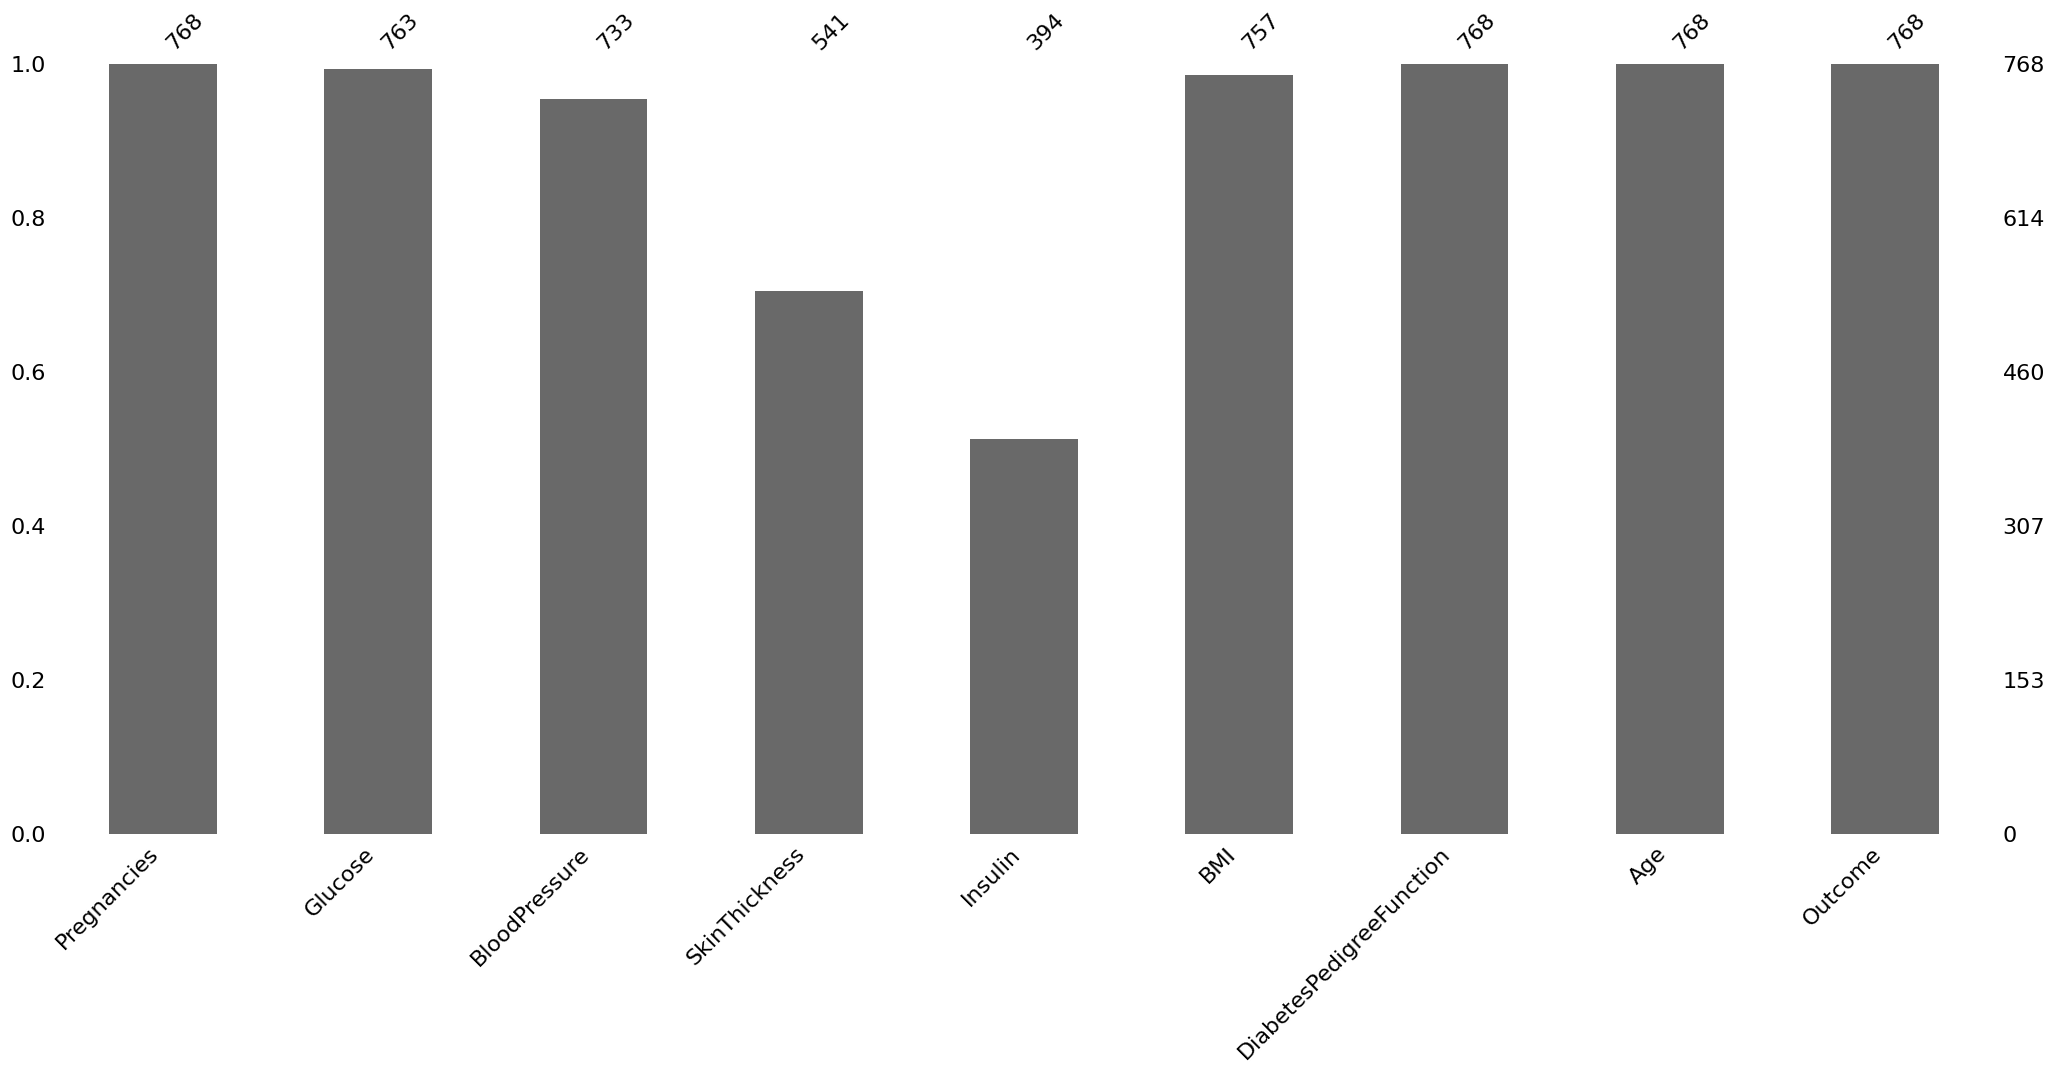

In [15]:
import missingno as msno
msno.bar(diabetics)

<AxesSubplot:>

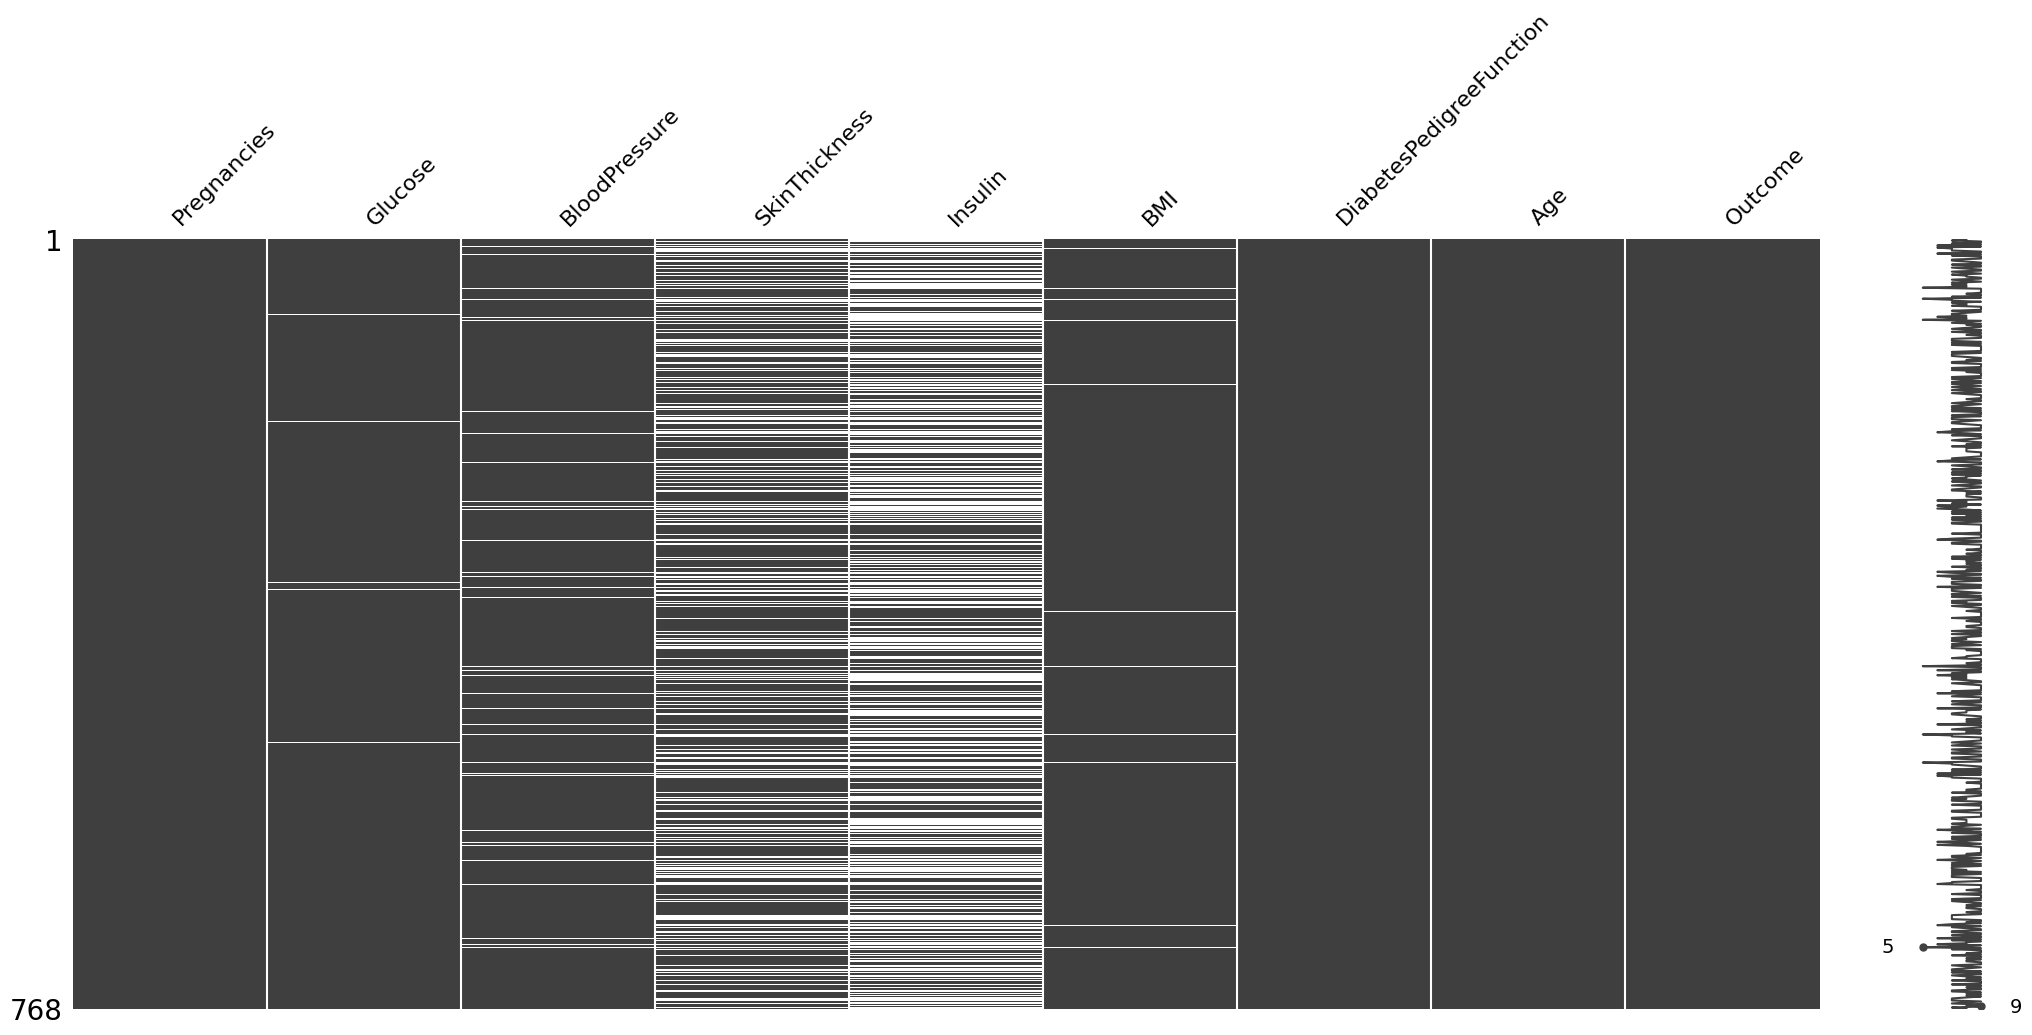

In [16]:
msno.matrix(diabetics)

In [17]:
print(diabetics.shape)

(768, 9)


In [18]:
diabetics_original= diabetics.copy()

### Drop the NAN (or missing values)

In [19]:
diabetics.dropna(inplace=True)
print(diabetics.shape)

(392, 9)


In [20]:
from sklearn.linear_model import LogisticRegression

data=diabetics.values
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

model=LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

C:\Users\manjay\.conda\envs\dgvs\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.])

### Replace NAN instead of dropping the rows

In [21]:
from sklearn.linear_model import LogisticRegression

diabetics=diabetics_original.fillna(diabetics.mean())

data=diabetics.values
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

model=LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

C:\Users\manjay\.conda\envs\dgvs\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import numpy as np

diabetics=diabetics_original.fillna(diabetics.mean())
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# transform the dataset
transformed_values = imputer.fit_transform(diabetics)

# data=diabetics.values
X, y = transformed_values[:, :-1], transformed_values[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

model=LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

C:\Users\manjay\.conda\envs\dgvs\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.

Other possible values for **strategy** are ---> 'mean', 'median','constant','most_frequent'